In [1]:
sc

from pyspark.sql import SQLContext,Row
from pyspark import SparkConf,SparkContext
import numpy as np
import pandas as pd

rdd=sc.textFile("file:///home/cloudera/Downloads/train.csv")   



In [2]:
rdd.take(1)

[u'Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice']

In [3]:
def func(line):
    l1=line.split(",")
    return Row(Id=l1[0],MSSubClass=l1[1],MSZoning=l1[2],LotFrontage=l1[3],
               LotArea=l1[4],Street=l1[5],Alley=l1[6],
               LotShape=l1[7],LandContour=l1[8],Utilities=l1[9],LotConfig=l1[10],
               LandSlope=l1[11],Neighborhood=l1[12],Condition1=l1[13],Condition2=l1[14],BldgType=l1[15],
               HouseStyle=l1[16],OverallQual=l1[17],OverallCond=l1[18],YearBuilt=l1[19],YearRemodAdd=l1[20],
               RoofStyle=l1[21],RoofMatl=l1[22],Exterior1st=l1[23],Exterior2nd=l1[24],MasVnrType=l1[25],
               MasVnrArea=l1[26],ExterQual=l1[27],ExterCond=l1[28],Foundation=l1[29],BsmtQual=l1[30],
               BsmtCond=l1[31],BsmtExposure=l1[32],BsmtFinType1=l1[33],BsmtFinSF1=l1[34],BsmtFinType2=l1[35],
               BsmtFinSF2=l1[36],BsmtUnfSF=l1[37],TotalBsmtSF=l1[38],Heating=l1[39],HeatingQC=l1[40],
               CentralAir=l1[41],Electrical=l1[42],firstFlrSF=l1[43],secondFlrSF=l1[44],LowQualFinSF=l1[45],
               GrLivArea=l1[46],BsmtFullBath=l1[47],BsmtHalfBath=l1[48],FullBath=l1[49],
               HalfBath=l1[50],BedroomAbvGr=l1[51],KitchenAbvGr=l1[52],KitchenQual=l1[53],
               TotRmsAbvGrd=l1[54],Functional=l1[55],Fireplaces=l1[56],
               FireplaceQu=l1[57],GarageType=l1[58],GarageYrBlt=l1[59],GarageFinish=l1[60],
               GarageCars=l1[61],GarageArea=l1[62],GarageQual=l1[63],GarageCond=l1[64],PavedDrive=l1[65],
               WoodDeckSF=l1[66],OpenPorchSF=l1[67],EnclosedPorch=l1[68],threeSsnPorch=l1[69],
               ScreenPorch=l1[70],PoolArea=l1[71],PoolQC=l1[72],Fence=l1[73],MiscFeature=l1[74],
               MiscVal=l1[75],MoSold=l1[76],YrSold=l1[77],SaleType=l1[78],SaleCondition=l1[79],SalePrice=l1[80])
 

In [4]:
res=rdd.map(func)

In [5]:
res.take(2)

[Row(Alley=u'Alley', BedroomAbvGr=u'BedroomAbvGr', BldgType=u'BldgType', BsmtCond=u'BsmtCond', BsmtExposure=u'BsmtExposure', BsmtFinSF1=u'BsmtFinSF1', BsmtFinSF2=u'BsmtFinSF2', BsmtFinType1=u'BsmtFinType1', BsmtFinType2=u'BsmtFinType2', BsmtFullBath=u'BsmtFullBath', BsmtHalfBath=u'BsmtHalfBath', BsmtQual=u'BsmtQual', BsmtUnfSF=u'BsmtUnfSF', CentralAir=u'CentralAir', Condition1=u'Condition1', Condition2=u'Condition2', Electrical=u'Electrical', EnclosedPorch=u'EnclosedPorch', ExterCond=u'ExterCond', ExterQual=u'ExterQual', Exterior1st=u'Exterior1st', Exterior2nd=u'Exterior2nd', Fence=u'Fence', FireplaceQu=u'FireplaceQu', Fireplaces=u'Fireplaces', Foundation=u'Foundation', FullBath=u'FullBath', Functional=u'Functional', GarageArea=u'GarageArea', GarageCars=u'GarageCars', GarageCond=u'GarageCond', GarageFinish=u'GarageFinish', GarageQual=u'GarageQual', GarageType=u'GarageType', GarageYrBlt=u'GarageYrBlt', GrLivArea=u'GrLivArea', HalfBath=u'HalfBath', Heating=u'Heating', HeatingQC=u'Heating

In [6]:
sqlcontext=SQLContext(sc)

In [7]:
temp=sqlcontext.createDataFrame(res)

In [8]:
temp.registerTempTable("temp_table")

In [9]:
sqlcontext.sql("select * from temp_table")

DataFrame[Alley: string, BedroomAbvGr: string, BldgType: string, BsmtCond: string, BsmtExposure: string, BsmtFinSF1: string, BsmtFinSF2: string, BsmtFinType1: string, BsmtFinType2: string, BsmtFullBath: string, BsmtHalfBath: string, BsmtQual: string, BsmtUnfSF: string, CentralAir: string, Condition1: string, Condition2: string, Electrical: string, EnclosedPorch: string, ExterCond: string, ExterQual: string, Exterior1st: string, Exterior2nd: string, Fence: string, FireplaceQu: string, Fireplaces: string, Foundation: string, FullBath: string, Functional: string, GarageArea: string, GarageCars: string, GarageCond: string, GarageFinish: string, GarageQual: string, GarageType: string, GarageYrBlt: string, GrLivArea: string, HalfBath: string, Heating: string, HeatingQC: string, HouseStyle: string, Id: string, KitchenAbvGr: string, KitchenQual: string, LandContour: string, LandSlope: string, LotArea: string, LotConfig: string, LotFrontage: string, LotShape: string, LowQualFinSF: string, MSSub

In [10]:
result = sqlcontext.sql("select count(*) from temp_table").collect()

In [11]:
result

[Row(_c0=1461)]

In [12]:
temp.printSchema()

root
 |-- Alley: string (nullable = true)
 |-- BedroomAbvGr: string (nullable = true)
 |-- BldgType: string (nullable = true)
 |-- BsmtCond: string (nullable = true)
 |-- BsmtExposure: string (nullable = true)
 |-- BsmtFinSF1: string (nullable = true)
 |-- BsmtFinSF2: string (nullable = true)
 |-- BsmtFinType1: string (nullable = true)
 |-- BsmtFinType2: string (nullable = true)
 |-- BsmtFullBath: string (nullable = true)
 |-- BsmtHalfBath: string (nullable = true)
 |-- BsmtQual: string (nullable = true)
 |-- BsmtUnfSF: string (nullable = true)
 |-- CentralAir: string (nullable = true)
 |-- Condition1: string (nullable = true)
 |-- Condition2: string (nullable = true)
 |-- Electrical: string (nullable = true)
 |-- EnclosedPorch: string (nullable = true)
 |-- ExterCond: string (nullable = true)
 |-- ExterQual: string (nullable = true)
 |-- Exterior1st: string (nullable = true)
 |-- Exterior2nd: string (nullable = true)
 |-- Fence: string (nullable = true)
 |-- FireplaceQu: string (nulla

In [13]:
#Counting the number of rows 
print("Number of Rows : "+str(temp.count()))

Number of Rows : 1461


In [14]:
temp.show(20)

+-----+------------+--------+--------+------------+----------+----------+------------+------------+------------+------------+--------+---------+----------+----------+----------+----------+-------------+---------+---------+-----------+-----------+-----+-----------+----------+----------+--------+----------+----------+----------+----------+------------+----------+----------+-----------+---------+--------+-------+---------+----------+---+------------+-----------+-----------+---------+-------+---------+-----------+--------+------------+----------+--------+----------+----------+-----------+-------+------+------------+-----------+-----------+-----------+----------+--------+------+--------+---------+-------------+---------+--------+-----------+------+------------+-----------+---------+----------+---------+------------+------+----------+-----------+-------------+
|Alley|BedroomAbvGr|BldgType|BsmtCond|BsmtExposure|BsmtFinSF1|BsmtFinSF2|BsmtFinType1|BsmtFinType2|BsmtFullBath|BsmtHalfBath|BsmtQual

In [15]:
#Continue
#df=temp.toPandas()
temp.columns

['Alley',
 'BedroomAbvGr',
 'BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtQual',
 'BsmtUnfSF',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'EnclosedPorch',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Fence',
 'FireplaceQu',
 'Fireplaces',
 'Foundation',
 'FullBath',
 'Functional',
 'GarageArea',
 'GarageCars',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'GarageYrBlt',
 'GrLivArea',
 'HalfBath',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'Id',
 'KitchenAbvGr',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotArea',
 'LotConfig',
 'LotFrontage',
 'LotShape',
 'LowQualFinSF',
 'MSSubClass',
 'MSZoning',
 'MasVnrArea',
 'MasVnrType',
 'MiscFeature',
 'MiscVal',
 'MoSold',
 'Neighborhood',
 'OpenPorchSF',
 'OverallCond',
 'OverallQual',
 'PavedDrive',
 'PoolArea',
 'PoolQC',
 'RoofMatl',
 'RoofStyle',
 'SaleCondition',
 'SalePrice',
 'Sal

In [16]:
#For Dropping columns having NA values more than 60%
#temp.groupBy(temp.columns[0]).count().show(5)
#temp.filter(temp.groupBy(temp.columns[0]).count()[temp.columns[0]] > 1000).show()
temp_dict={}
for i in range(0,len(temp.columns)):
    temp_dict[temp.columns[i]]=temp.groupBy(temp.columns[i]).count().first()[1],temp.groupBy(temp.columns[i]).count().first()[0]
    

In [17]:
l=[]
for key in temp_dict.keys():
    if temp_dict[key][0]>1000:
        l.append(key)
    else:
        continue

In [18]:
l

['LandSlope',
 'BsmtHalfBath',
 'MiscFeature',
 'Utilities',
 'PoolQC',
 'PoolArea',
 'Fence',
 'SaleCondition',
 'Alley',
 'RoofStyle']

In [19]:
for col in l:
    print(str(temp.groupBy(col).count().show()))
    #print(temp_dict[col])

+---------+-----+
|LandSlope|count|
+---------+-----+
|      Gtl| 1382|
|      Mod|   65|
|LandSlope|    1|
|      Sev|   13|
+---------+-----+

None
+------------+-----+
|BsmtHalfBath|count|
+------------+-----+
|           0| 1378|
|           1|   80|
|           2|    2|
|BsmtHalfBath|    1|
+------------+-----+

None
+-----------+-----+
|MiscFeature|count|
+-----------+-----+
|         NA| 1406|
|       Gar2|    2|
|       TenC|    1|
|MiscFeature|    1|
|       Shed|   49|
|       Othr|    2|
+-----------+-----+

None
+---------+-----+
|Utilities|count|
+---------+-----+
|   AllPub| 1459|
|   NoSeWa|    1|
|Utilities|    1|
+---------+-----+

None
+------+-----+
|PoolQC|count|
+------+-----+
|    NA| 1453|
|    Gd|    3|
|PoolQC|    1|
|    Ex|    2|
|    Fa|    2|
+------+-----+

None
+--------+-----+
|PoolArea|count|
+--------+-----+
|       0| 1453|
|     576|    1|
|     738|    1|
|     512|    1|
|     519|    1|
|     480|    1|
|     648|    1|
|PoolArea|    1|
|     555|

In [20]:
#Dropping columns having same values for most instances
for col in l:
    temp=temp.drop(col)
#Total 10 columns dropped

In [21]:
print("Total Number of columns:"+" "+str(len(temp.columns)))

Total Number of columns: 71


In [22]:
temp.toPandas()

,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtQual,...,Street,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,firstFlrSF,secondFlrSF,threeSsnPorch
0,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtQual,...,Street,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,1stFlrSF,2ndFlrSF,3SsnPorch
1,3,1Fam,TA,No,706,0,GLQ,Unf,1,Gd,...,Pave,8,856,0,2003,2003,2008,856,854,0
2,3,1Fam,TA,Gd,978,0,ALQ,Unf,0,Gd,...,Pave,6,1262,298,1976,1976,2007,1262,0,0
3,3,1Fam,TA,Mn,486,0,GLQ,Unf,1,Gd,...,Pave,6,920,0,2001,2002,2008,920,866,0
4,3,1Fam,Gd,No,216,0,ALQ,Unf,1,TA,...,Pave,7,756,0,1915,1970,2006,961,756,0
5,4,1Fam,TA,Av,655,0,GLQ,Unf,1,Gd,...,Pave,9,1145,192,2000,2000,2008,1145,1053,0
6,1,1Fam,TA,No,732,0,GLQ,Unf,1,Gd,...,Pave,5,796,40,1993,1995,2009,796,566,320
7,3,1Fam,TA,Av,1369,0,GLQ,Unf,1,Ex,...,Pave,7,1686,255,2004,2005,2007,1694,0,0
8,3,1Fam,TA,Mn,859,32,ALQ,BLQ,1,Gd,...,Pave,7,1107,235,1973,1973,2009,1107,983,0
9,2,1Fam,TA,No,0,0,Unf,Unf,0,TA,...,Pave,8,952,90,1931,1950,2008,1022,752,0


In [23]:
temp.show(1,truncate=True)

+------------+--------+--------+------------+----------+----------+------------+------------+------------+--------+---------+----------+----------+----------+----------+-------------+---------+---------+-----------+-----------+-----------+----------+----------+--------+----------+----------+----------+----------+------------+----------+----------+-----------+---------+--------+-------+---------+----------+---+------------+-----------+-----------+-------+---------+-----------+--------+------------+----------+--------+----------+----------+-------+------+------------+-----------+-----------+-----------+----------+--------+---------+--------+-----------+------+------------+-----------+----------+---------+------------+------+----------+-----------+-------------+
|BedroomAbvGr|BldgType|BsmtCond|BsmtExposure|BsmtFinSF1|BsmtFinSF2|BsmtFinType1|BsmtFinType2|BsmtFullBath|BsmtQual|BsmtUnfSF|CentralAir|Condition1|Condition2|Electrical|EnclosedPorch|ExterCond|ExterQual|Exterior1st|Exterior2nd|Fir

In [24]:
temp.toPandas()

,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtQual,...,Street,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,firstFlrSF,secondFlrSF,threeSsnPorch
0,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtQual,...,Street,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,1stFlrSF,2ndFlrSF,3SsnPorch
1,3,1Fam,TA,No,706,0,GLQ,Unf,1,Gd,...,Pave,8,856,0,2003,2003,2008,856,854,0
2,3,1Fam,TA,Gd,978,0,ALQ,Unf,0,Gd,...,Pave,6,1262,298,1976,1976,2007,1262,0,0
3,3,1Fam,TA,Mn,486,0,GLQ,Unf,1,Gd,...,Pave,6,920,0,2001,2002,2008,920,866,0
4,3,1Fam,Gd,No,216,0,ALQ,Unf,1,TA,...,Pave,7,756,0,1915,1970,2006,961,756,0
5,4,1Fam,TA,Av,655,0,GLQ,Unf,1,Gd,...,Pave,9,1145,192,2000,2000,2008,1145,1053,0
6,1,1Fam,TA,No,732,0,GLQ,Unf,1,Gd,...,Pave,5,796,40,1993,1995,2009,796,566,320
7,3,1Fam,TA,Av,1369,0,GLQ,Unf,1,Ex,...,Pave,7,1686,255,2004,2005,2007,1694,0,0
8,3,1Fam,TA,Mn,859,32,ALQ,BLQ,1,Gd,...,Pave,7,1107,235,1973,1973,2009,1107,983,0
9,2,1Fam,TA,No,0,0,Unf,Unf,0,TA,...,Pave,8,952,90,1931,1950,2008,1022,752,0


In [39]:
#temp.registerTempTable("new_temp")

In [25]:
#sqlcontext.sql("select * from new_temp")

In [26]:
df=temp.toPandas().iloc[1:,:]

In [27]:
temp=sqlcontext.createDataFrame(df)

In [28]:
type(temp)

pyspark.sql.dataframe.DataFrame

In [29]:
temp.count()

1460

In [33]:
temp.toPandas().head(5)

,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtQual,...,Street,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,firstFlrSF,secondFlrSF,threeSsnPorch
0,3,1Fam,TA,No,706,0,GLQ,Unf,1,Gd,...,Pave,8,856,0,2003,2003,2008,856,854,0
1,3,1Fam,TA,Gd,978,0,ALQ,Unf,0,Gd,...,Pave,6,1262,298,1976,1976,2007,1262,0,0
2,3,1Fam,TA,Mn,486,0,GLQ,Unf,1,Gd,...,Pave,6,920,0,2001,2002,2008,920,866,0
3,3,1Fam,Gd,No,216,0,ALQ,Unf,1,TA,...,Pave,7,756,0,1915,1970,2006,961,756,0
4,4,1Fam,TA,Av,655,0,GLQ,Unf,1,Gd,...,Pave,9,1145,192,2000,2000,2008,1145,1053,0


+--------+
|BsmtCond|
+--------+
|      NA|
|      Gd|
|      Po|
|      Fa|
|      TA|
+--------+



In [ ]:
from pyspark.ml.feature import StringIndexer

In [55]:
indexer = StringIndexer(inputCol="BldgType", outputCol="BldgType_categorical")
indexed = indexer.fit(temp).transform(temp)
indexed.show()

+------------+--------+--------+------------+----------+----------+------------+------------+------------+--------+---------+----------+----------+----------+----------+-------------+---------+---------+-----------+-----------+-----------+----------+----------+--------+----------+----------+----------+----------+------------+----------+----------+-----------+---------+--------+-------+---------+----------+---+------------+-----------+-----------+-------+---------+-----------+--------+------------+----------+--------+----------+----------+-------+------+------------+-----------+-----------+-----------+----------+--------+---------+--------+-----------+------+------------+-----------+----------+---------+------------+------+----------+-----------+-------------+--------------------+
|BedroomAbvGr|BldgType|BsmtCond|BsmtExposure|BsmtFinSF1|BsmtFinSF2|BsmtFinType1|BsmtFinType2|BsmtFullBath|BsmtQual|BsmtUnfSF|CentralAir|Condition1|Condition2|Electrical|EnclosedPorch|ExterCond|ExterQual|Exteri

In [64]:
NA_cols=[]
for col in temp_dict.keys():
    if 'NA' in temp_dict[col]:
        NA_cols.append(col)
    else:
        continue
        

In [67]:
k=list(set(NA_cols)-set(l))

In [71]:
temp.select(k[0]).distinct().show()

+----------+
|MasVnrType|
+----------+
|        NA|
|    BrkCmn|
|     Stone|
|   BrkFace|
|      None|
+----------+



In [78]:
#Remove rows with NA values in MasVnrType
temp.registerTempTable("new_temp")
sqlcontext.sql("select MasVnrType,MasVnrArea from new_temp where MasVnrType='NA'").toPandas()

,MasVnrType,MasVnrArea
0,NA,NA
1,NA,NA
2,NA,NA
3,NA,NA
4,NA,NA
5,NA,NA
6,NA,NA
7,NA,NA


In [83]:
temp.select(k[5]).distinct().show()

+----------+
|Electrical|
+----------+
|        NA|
|     FuseA|
|     FuseF|
|     FuseP|
|       Mix|
|     SBrkr|
+----------+



In [88]:
#Remove rows with NA values in Electrical -Just 1 row
temp.registerTempTable("new_temp")
sqlcontext.sql("select Electrical,CentralAir,HeatingQC ,SalePrice from new_temp where Electrical='NA'").toPandas()

,Electrical,CentralAir,HeatingQC,SalePrice
0,NA,Y,Gd,167500


In [95]:
temp.select(k[10]).distinct().show()

+----------+
|GarageType|
+----------+
|        NA|
|    Attchd|
|    2Types|
|   BuiltIn|
|    Detchd|
|   CarPort|
|   Basment|
+----------+



In [102]:
#Remove rows with NA values in Electrical -Just 1 row
temp.registerTempTable("new_temp")
clean_temp=sqlcontext.sql("select * from (select * from new_temp where MasVnrType!='NA') as s where s.Electrical!='NA'")

In [104]:
#All NA values treated in columns which did not have any data
#Remaining NA values will be treated as seperate category

In [ ]:
from pyspark.sql.types import DoubleType

changedTypedf = clean_temp.withColumn("label", joindf["show"].cast(DoubleType()))

In [ ]:
for col in clean_temp.columns:
    if int()

In [111]:
int(clean_temp.select(clean_temp.columns[3]))

TypeError: int() argument must be a string or a number, not 'DataFrame'

In [182]:

clean_temp1=clean_temp.select(clean_temp.BedroomAbvGr.cast('float'))

In [126]:
clean_temp.select(clean_temp.Electrical.cast('float'))

+----------+
|Electrical|
+----------+
|      null|
|      null|
|      null|
|      null|
|      null|
|      null|
|      null|
|      null|
|      null|
|      null|
|      null|
|      null|
|      null|
|      null|
|      null|
|      null|
|      null|
|      null|
|      null|
|      null|
+----------+
only showing top 20 rows



In [167]:
clean_temp.select('MiscVal').show()#

+-------+
|MiscVal|
+-------+
|      0|
|      0|
|      0|
|      0|
|      0|
|    700|
|      0|
|    350|
|      0|
|      0|
|      0|
|      0|
|      0|
|      0|
|      0|
|      0|
|    700|
|    500|
|      0|
|      0|
+-------+
only showing top 20 rows



In [170]:
num_cols=['MiscVal','ScreenPorch','threeSsnPorch','EnclosedPorch','OpenPorchSF','WoodDeckSF','GarageArea','GarageCars','Fireplaces','LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','firstFlrSF','secondFlrSF','LowQualFinSF','GrLivArea','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd']

In [215]:
#clean_temp.select(clean_temp.cast('float'))

In [213]:
clean_temp.toPandas()

,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtQual,...,Street,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,firstFlrSF,secondFlrSF,threeSsnPorch
0,3,1Fam,TA,No,706,0,GLQ,Unf,1,Gd,...,Pave,8,856,0,2003,2003,2008,856,854,0
1,3,1Fam,TA,Gd,978,0,ALQ,Unf,0,Gd,...,Pave,6,1262,298,1976,1976,2007,1262,0,0
2,3,1Fam,TA,Mn,486,0,GLQ,Unf,1,Gd,...,Pave,6,920,0,2001,2002,2008,920,866,0
3,3,1Fam,Gd,No,216,0,ALQ,Unf,1,TA,...,Pave,7,756,0,1915,1970,2006,961,756,0
4,4,1Fam,TA,Av,655,0,GLQ,Unf,1,Gd,...,Pave,9,1145,192,2000,2000,2008,1145,1053,0
5,1,1Fam,TA,No,732,0,GLQ,Unf,1,Gd,...,Pave,5,796,40,1993,1995,2009,796,566,320
6,3,1Fam,TA,Av,1369,0,GLQ,Unf,1,Ex,...,Pave,7,1686,255,2004,2005,2007,1694,0,0
7,3,1Fam,TA,Mn,859,32,ALQ,BLQ,1,Gd,...,Pave,7,1107,235,1973,1973,2009,1107,983,0
8,2,1Fam,TA,No,0,0,Unf,Unf,0,TA,...,Pave,8,952,90,1931,1950,2008,1022,752,0
9,2,2fmCon,TA,No,851,0,GLQ,Unf,1,TA,...,Pave,5,991,0,1939,1950,2008,1077,0,0


['LandSlope',
 'BsmtHalfBath',
 'MiscFeature',
 'Utilities',
 'PoolQC',
 'PoolArea',
 'Fence',
 'SaleCondition',
 'Alley',
 'RoofStyle']

In [68]:
df = temp.toPandas()

In [70]:
df=df.iloc[1:,:]

In [71]:
df.head()

,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtQual,...,Street,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,firstFlrSF,secondFlrSF,threeSsnPorch
1,3,1Fam,TA,Gd,978,0,ALQ,Unf,0,Gd,...,Pave,6,1262,298,1976,1976,2007,1262,0,0
2,3,1Fam,TA,Mn,486,0,GLQ,Unf,1,Gd,...,Pave,6,920,0,2001,2002,2008,920,866,0
3,3,1Fam,Gd,No,216,0,ALQ,Unf,1,TA,...,Pave,7,756,0,1915,1970,2006,961,756,0
4,4,1Fam,TA,Av,655,0,GLQ,Unf,1,Gd,...,Pave,9,1145,192,2000,2000,2008,1145,1053,0
5,1,1Fam,TA,No,732,0,GLQ,Unf,1,Gd,...,Pave,5,796,40,1993,1995,2009,796,566,320


In [31]:
df.iloc[1,70:]

threeSsnPorch    0
Name: 2, dtype: object

In [73]:
#int columns:
#BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GrLivArea,HalfBath,Id,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,firstFlrSF,secondFlrSF,threeSsnPorch

In [76]:
df[['BedroomAbvGr','BsmtFinSF1','BsmtFinSF2','BsmtFullBath','BsmtUnfSF','EnclosedPorch','Fireplaces','FullBath','GarageArea','GarageCars','GrLivArea','HalfBath','Id','KitchenAbvGr','LotArea','LowQualFinSF','MSSubClass','MiscVal','MoSold','OpenPorchSF','OverallCond','OverallQual','SalePrice','ScreenPorch','TotRmsAbvGrd','TotalBsmtSF','WoodDeckSF','firstFlrSF','secondFlrSF','threeSsnPorch']]=df[['BedroomAbvGr','BsmtFinSF1','BsmtFinSF2','BsmtFullBath','BsmtUnfSF','EnclosedPorch','Fireplaces','FullBath','GarageArea','GarageCars','GrLivArea','HalfBath','Id','KitchenAbvGr','LotArea','LowQualFinSF','MSSubClass','MiscVal','MoSold','OpenPorchSF','OverallCond','OverallQual','SalePrice','ScreenPorch','TotRmsAbvGrd','TotalBsmtSF','WoodDeckSF','firstFlrSF','secondFlrSF','threeSsnPorch']].astype('int')

In [77]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = df.select_dtypes(include=numerics)

In [78]:
newdf

,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,...,OverallCond,OverallQual,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,firstFlrSF,secondFlrSF,threeSsnPorch
1,3,978,0,0,284,0,1,2,460,2,...,8,6,181500,0,6,1262,298,1262,0,0
2,3,486,0,1,434,0,1,2,608,2,...,5,7,223500,0,6,920,0,920,866,0
3,3,216,0,1,540,272,1,1,642,3,...,5,7,140000,0,7,756,0,961,756,0
4,4,655,0,1,490,0,1,2,836,3,...,5,8,250000,0,9,1145,192,1145,1053,0
5,1,732,0,1,64,0,0,1,480,2,...,5,5,143000,0,5,796,40,796,566,320
6,3,1369,0,1,317,0,1,2,636,2,...,5,8,307000,0,7,1686,255,1694,0,0
7,3,859,32,1,216,228,2,2,484,2,...,6,7,200000,0,7,1107,235,1107,983,0
8,2,0,0,0,952,205,2,2,468,2,...,5,7,129900,0,8,952,90,1022,752,0
9,2,851,0,1,140,0,2,1,205,1,...,6,5,118000,0,5,991,0,1077,0,0
10,3,906,0,1,134,0,0,1,384,1,...,5,5,129500,0,5,1040,0,1040,0,0


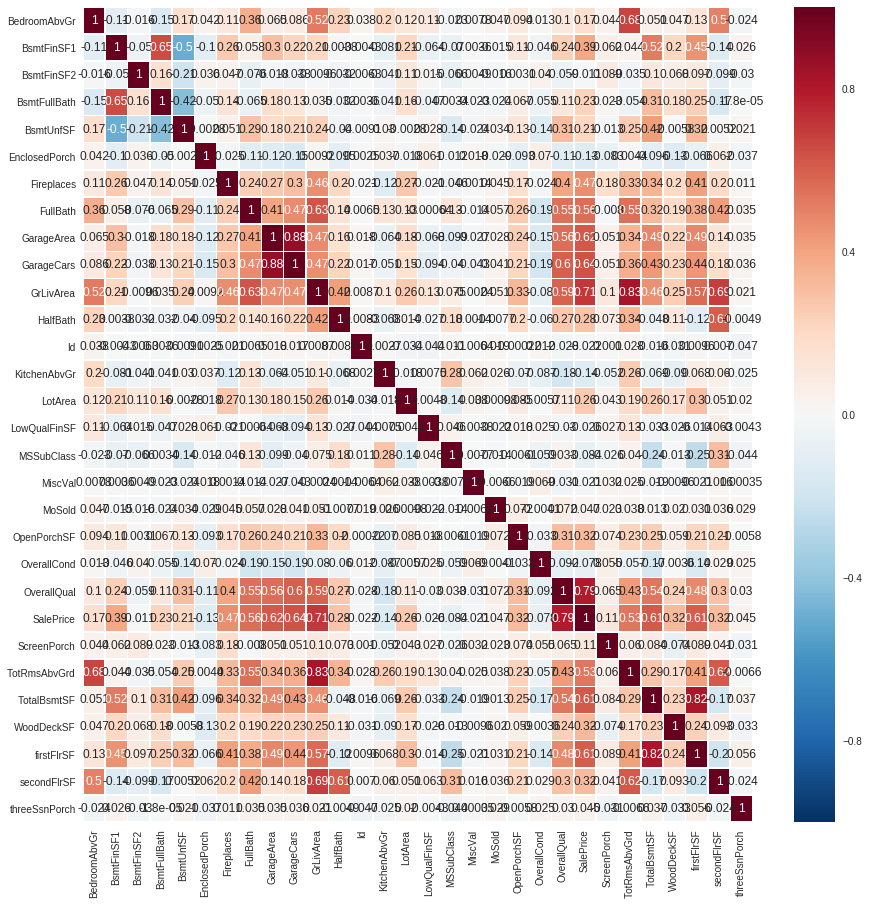

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
sns.heatmap(newdf.corr(), annot=True, linewidths=.5, ax=ax)
plt.show()

/home/cloudera/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  app.launch_new_instance()


In [81]:
#import numpy as np

In [82]:
#df.Alley.value_counts()

In [233]:
df.BsmtCond.value_counts()

TA    1311
Gd      65
Fa      45
NA      37
Po       2
Name: BsmtCond, dtype: int64

In [234]:
#df['BsmtFinSF1']=df['BsmtFinSF1'].replace('NA',0)

In [235]:
#df['BsmtFinSF2']=df['BsmtFinSF2'].replace('NA',0)

In [236]:
#df.drop('Alley',axis=1,inplace=True)

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 1 to 1460
Data columns (total 80 columns):
BedroomAbvGr     1460 non-null int64
BldgType         1460 non-null object
BsmtCond         1460 non-null object
BsmtExposure     1460 non-null object
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtFinType1     1460 non-null object
BsmtFinType2     1460 non-null object
BsmtFullBath     1460 non-null int64
BsmtHalfBath     1460 non-null int64
BsmtQual         1460 non-null object
BsmtUnfSF        1460 non-null int64
CentralAir       1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
Electrical       1460 non-null object
EnclosedPorch    1460 non-null int64
ExterCond        1460 non-null object
ExterQual        1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
Fence            1460 non-null object
FireplaceQu      1460 non-null object
Fireplaces       1460 non-

In [83]:
obj_df = df.select_dtypes(include=['object']).copy()


In [84]:
obj_df = obj_df.assign(sale = df['SalePrice'],index=obj_df.index)
obj_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 1 to 1459
Data columns (total 43 columns):
BldgType        1459 non-null object
BsmtCond        1459 non-null object
BsmtExposure    1459 non-null object
BsmtFinType1    1459 non-null object
BsmtFinType2    1459 non-null object
BsmtQual        1459 non-null object
CentralAir      1459 non-null object
Condition1      1459 non-null object
Condition2      1459 non-null object
Electrical      1459 non-null object
ExterCond       1459 non-null object
ExterQual       1459 non-null object
Exterior1st     1459 non-null object
Exterior2nd     1459 non-null object
FireplaceQu     1459 non-null object
Foundation      1459 non-null object
Functional      1459 non-null object
GarageCond      1459 non-null object
GarageFinish    1459 non-null object
GarageQual      1459 non-null object
GarageType      1459 non-null object
GarageYrBlt     1459 non-null object
Heating         1459 non-null object
HeatingQC       1459 non-null object
House

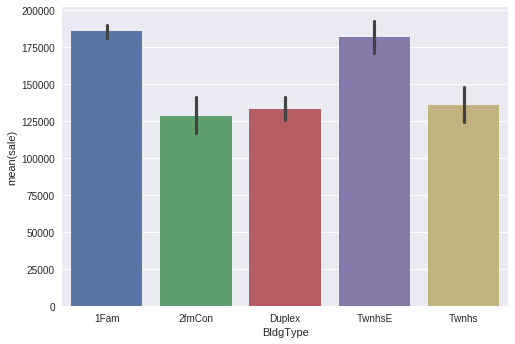

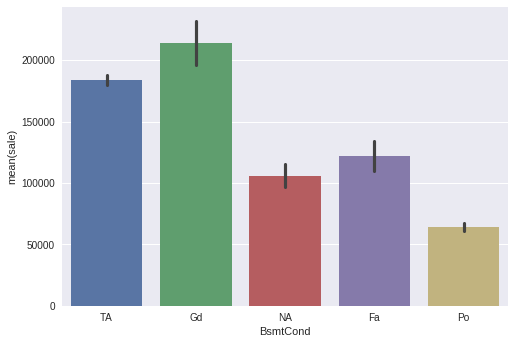

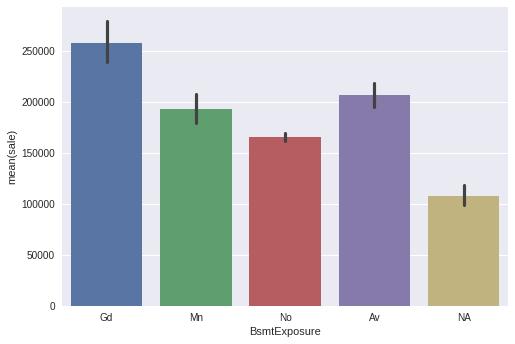

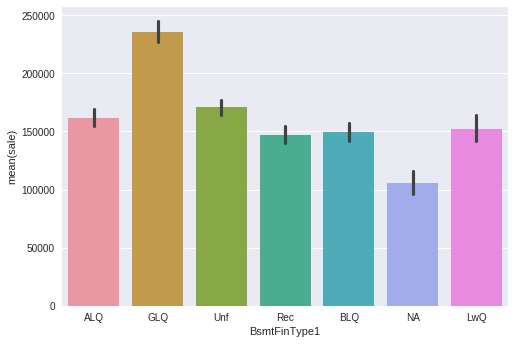

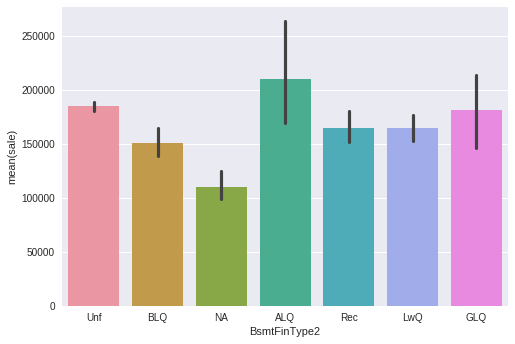

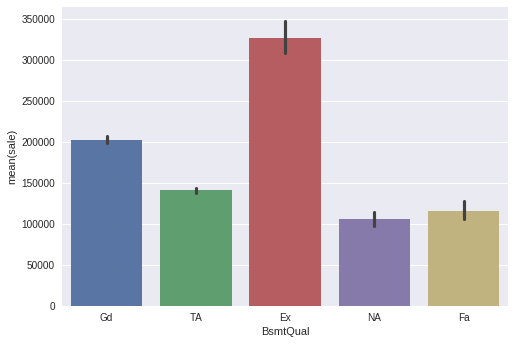

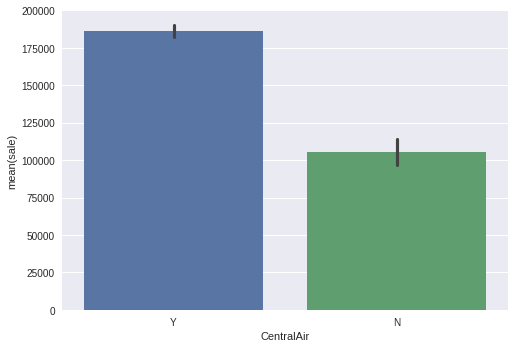

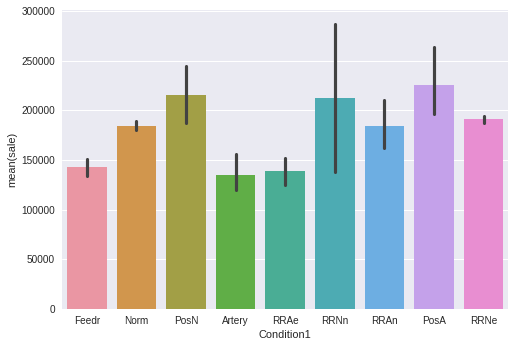

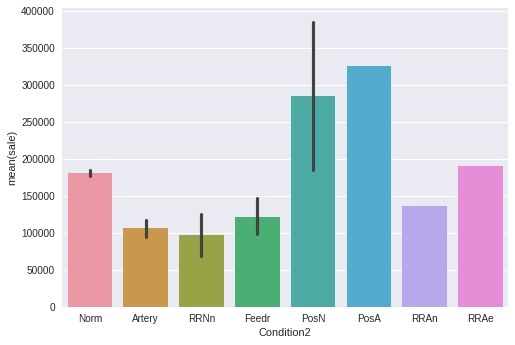

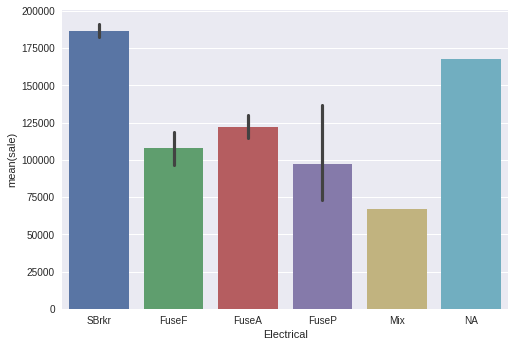

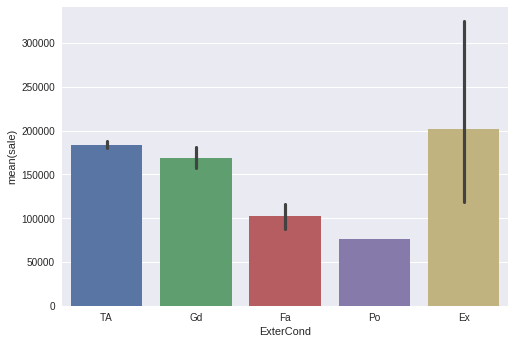

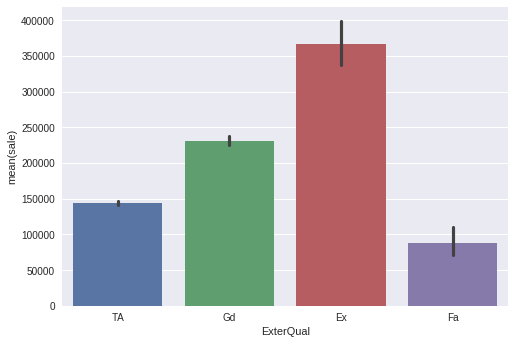

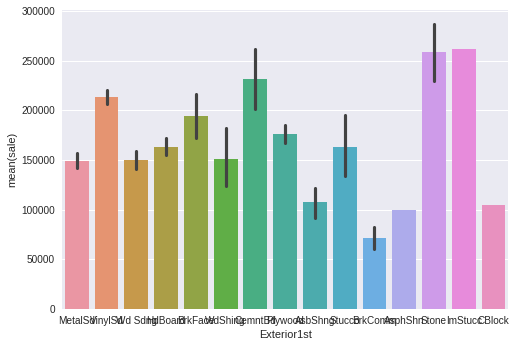

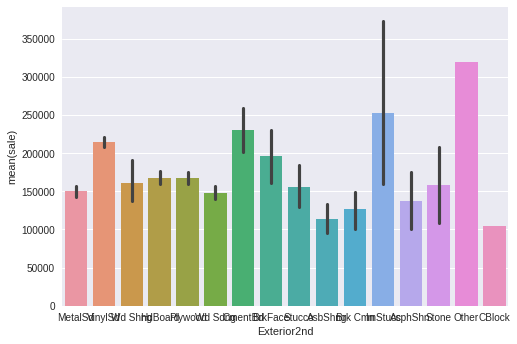

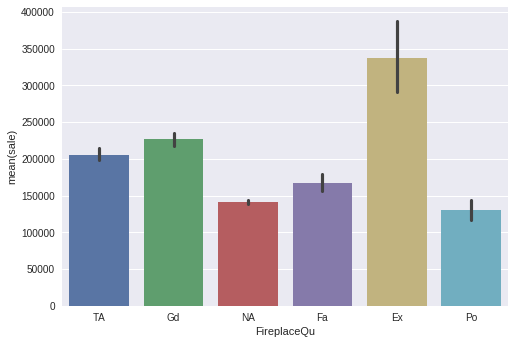

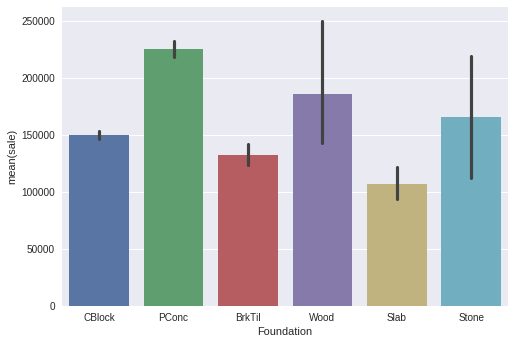

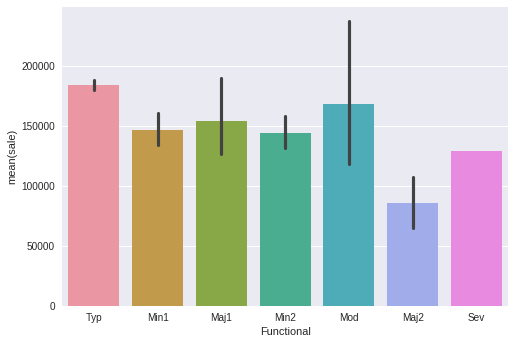

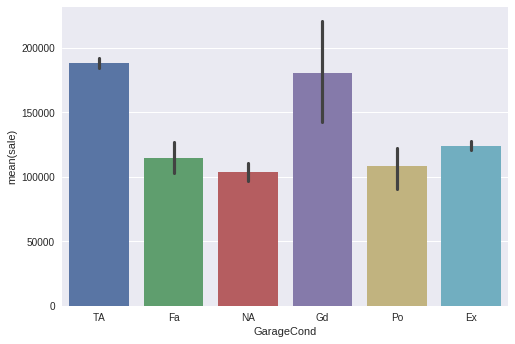

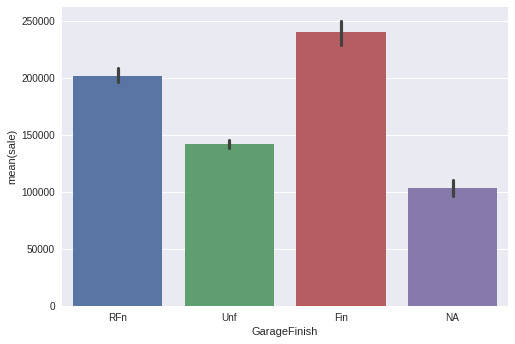

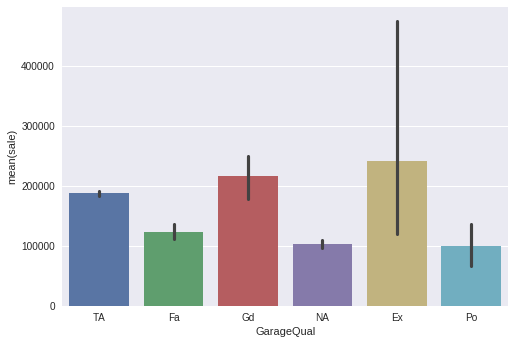

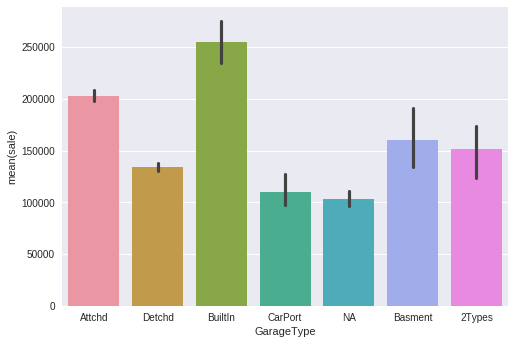

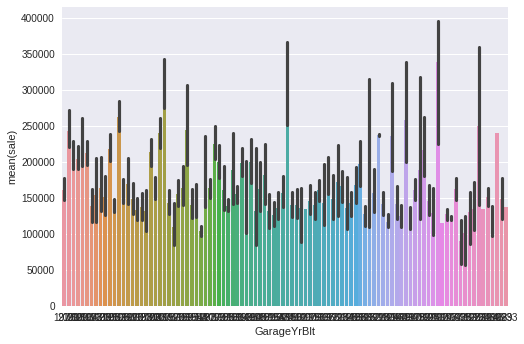

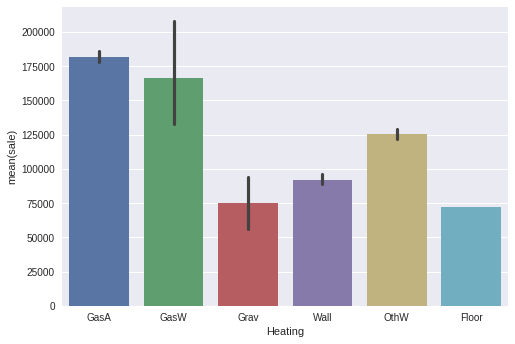

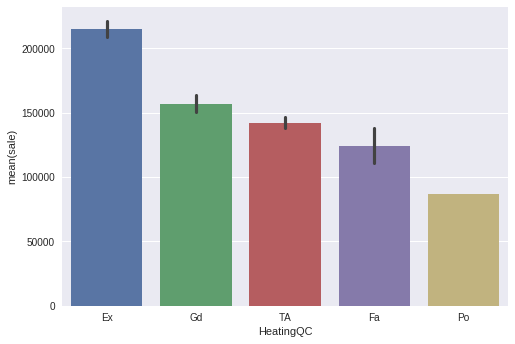

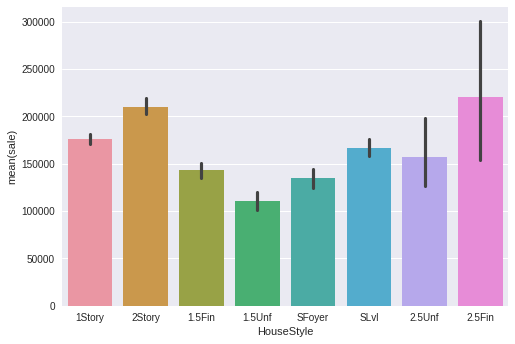

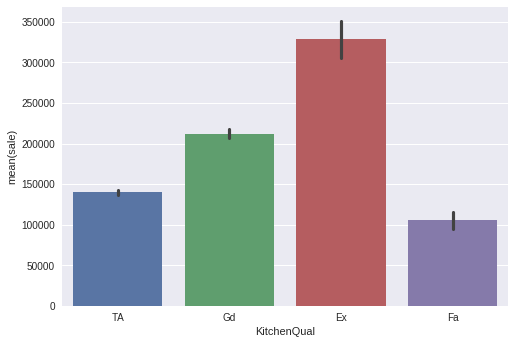

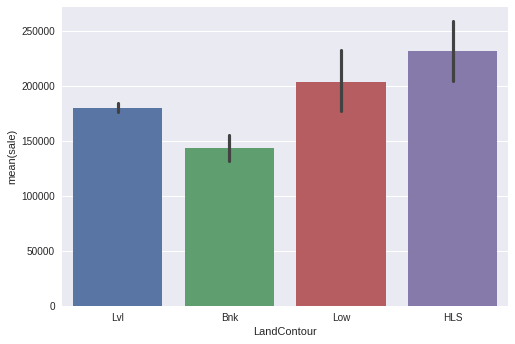

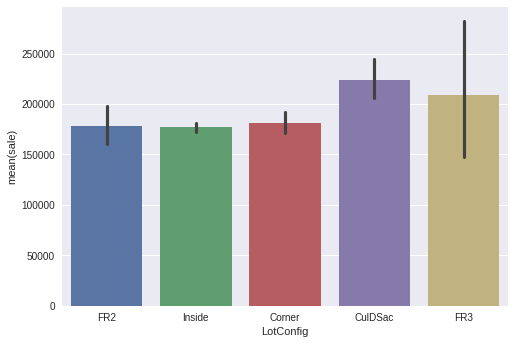

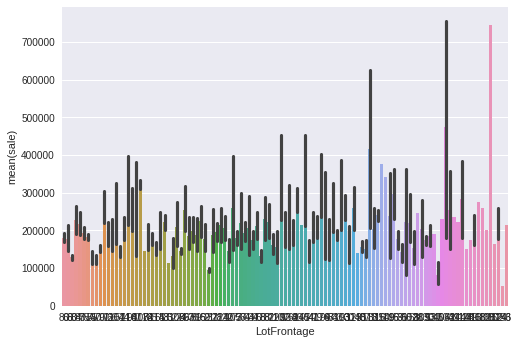

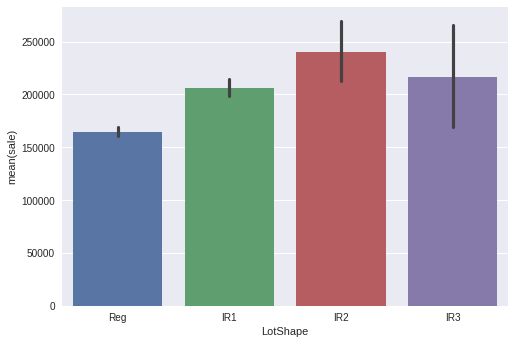

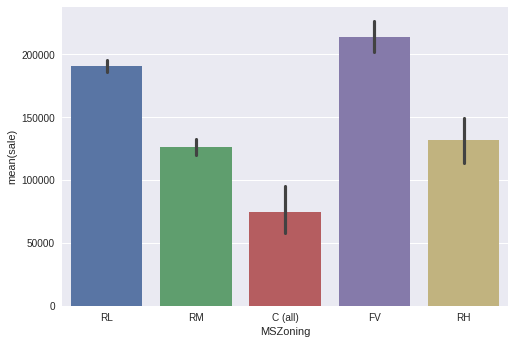

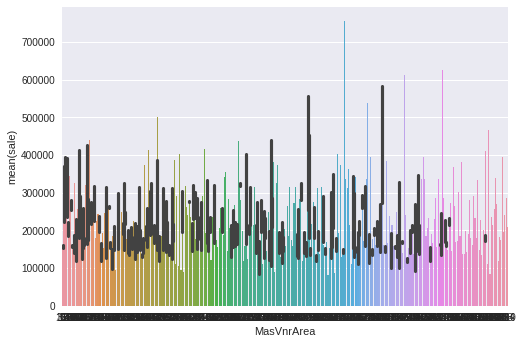

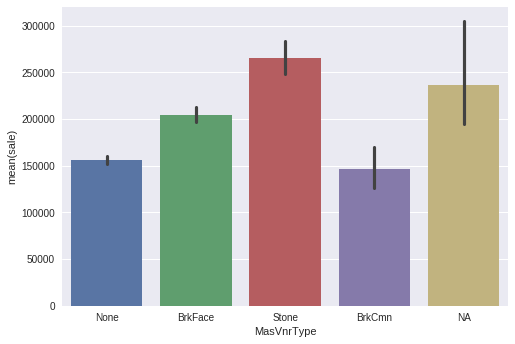

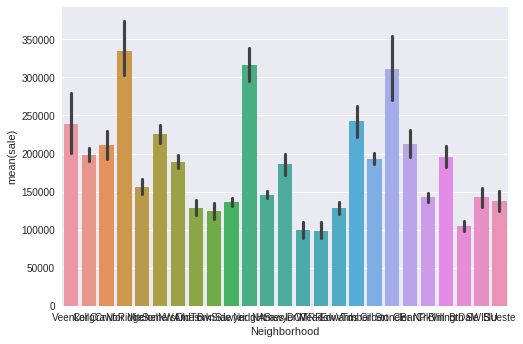

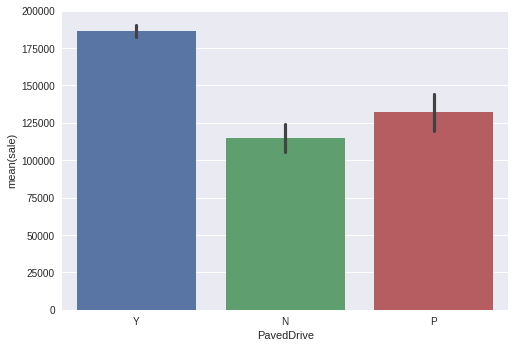

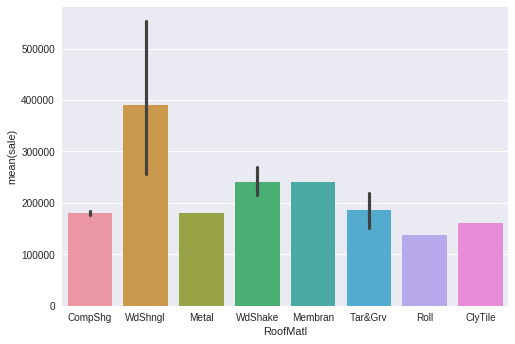

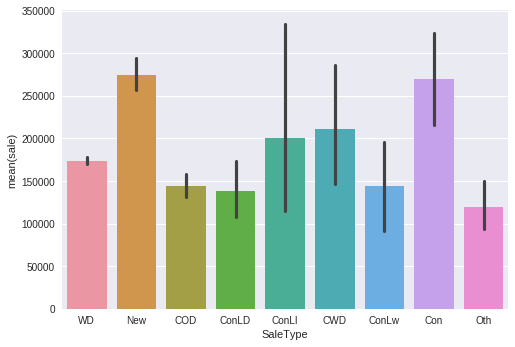

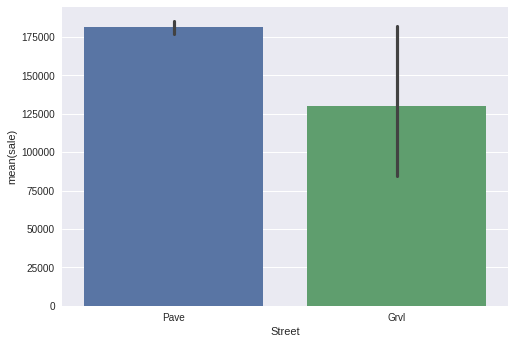

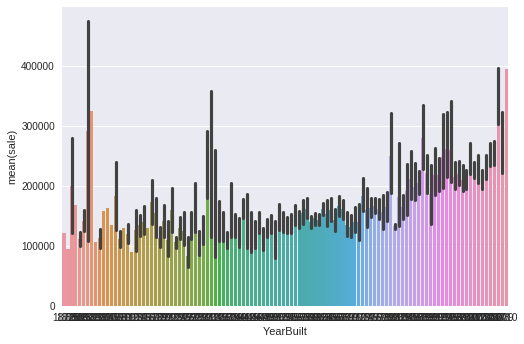

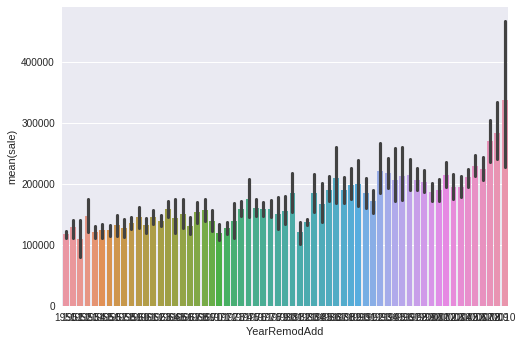

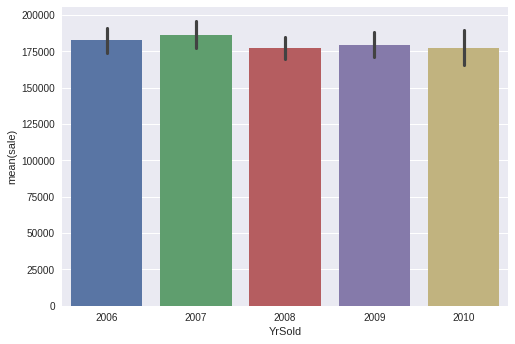

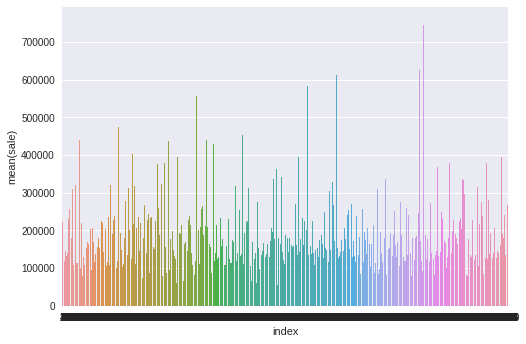

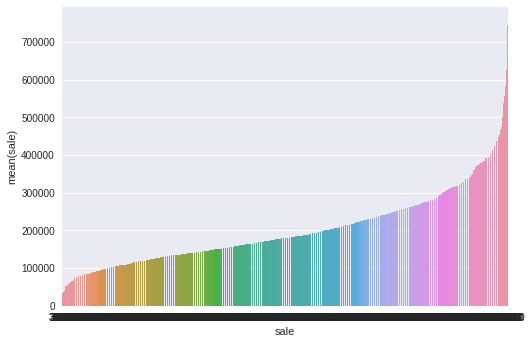

In [91]:
for i in obj_df.columns:
    sns.barplot(x=i,y='sale',data=obj_df,estimator=np.mean)
    plt.show()

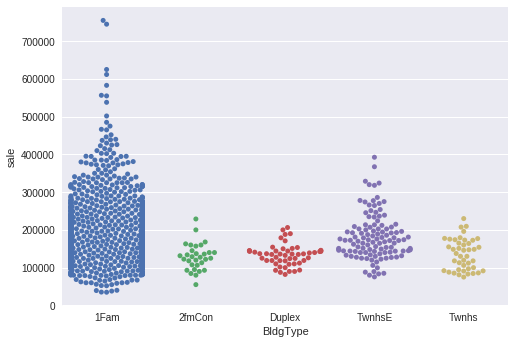

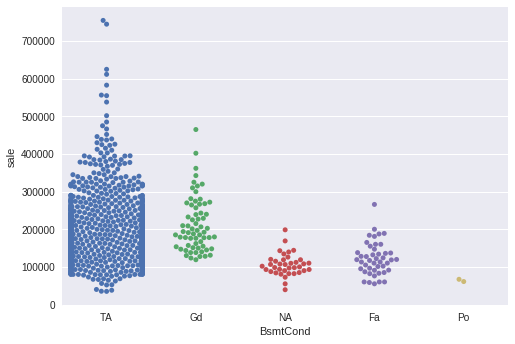

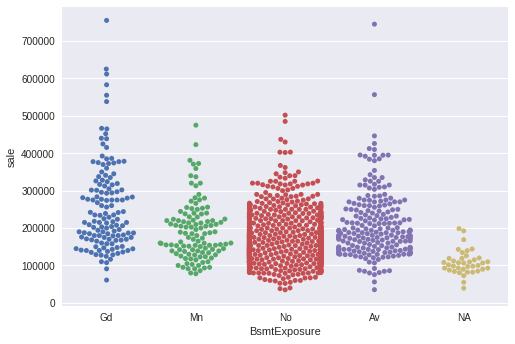

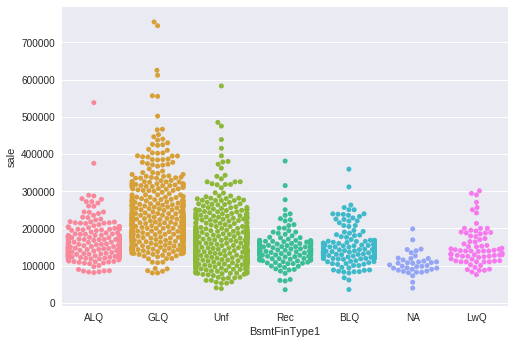

KeyboardInterrupt: 

In [89]:
for i in obj_df.columns:
    sns.swarmplot(x=i,y='sale',data=obj_df)
    plt.show()

In [241]:
for i in df.columns:
    print(i)

BedroomAbvGr
BldgType
BsmtCond
BsmtExposure
BsmtFinSF1
BsmtFinSF2
BsmtFinType1
BsmtFinType2
BsmtFullBath
BsmtHalfBath
BsmtQual
BsmtUnfSF
CentralAir
Condition1
Condition2
Electrical
EnclosedPorch
ExterCond
ExterQual
Exterior1st
Exterior2nd
Fence
FireplaceQu
Fireplaces
Foundation
FullBath
Functional
GarageArea
GarageCars
GarageCond
GarageFinish
GarageQual
GarageType
GarageYrBlt
GrLivArea
HalfBath
Heating
HeatingQC
HouseStyle
Id
KitchenAbvGr
KitchenQual
LandContour
LandSlope
LotArea
LotConfig
LotFrontage
LotShape
LowQualFinSF
MSSubClass
MSZoning
MasVnrArea
MasVnrType
MiscFeature
MiscVal
MoSold
Neighborhood
OpenPorchSF
OverallCond
OverallQual
PavedDrive
PoolArea
PoolQC
RoofMatl
RoofStyle
SaleCondition
SalePrice
SaleType
ScreenPorch
Street
TotRmsAbvGrd
TotalBsmtSF
Utilities
WoodDeckSF
YearBuilt
YearRemodAdd
YrSold
firstFlrSF
secondFlrSF
threeSsnPorch


In [123]:
#Checking for nulls

obj_df[obj_df.isnull().any(axis=1)]

,BldgType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,CentralAir,Condition1,Condition2,Electrical,...,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,Street,Utilities,YearBuilt,YearRemodAdd,YrSold


In [124]:
obj_df["Condition1"].value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [125]:
obj_df['Condition2'].value_counts()

Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
RRAn         1
RRAe         1
PosA         1
Name: Condition2, dtype: int64

In [126]:
cleanup_nums = {"Condition1":  {"Norm": 1, "Feedr": 2,"Artery": 3, "RRNn": 4, "PosN": 5, "RRAn": 6,
                                  "RRAe": 7, "PosA": 8, "RRNe":9 },
                "Condition2": {"Norm": 1, "Feedr": 2,"Artery": 3, "RRNn": 4, "PosN": 5, "RRAn": 6,
                                  "RRAe": 7, "PosA": 8, "RRNe":9 }}

In [127]:
obj_df.replace(cleanup_nums, inplace=True)

In [128]:
obj_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 1 to 1460
Data columns (total 48 columns):
BldgType         1460 non-null object
BsmtCond         1460 non-null object
BsmtExposure     1460 non-null object
BsmtFinType1     1460 non-null object
BsmtFinType2     1460 non-null object
BsmtQual         1460 non-null object
CentralAir       1460 non-null object
Condition1       1460 non-null int64
Condition2       1460 non-null int64
Electrical       1460 non-null object
ExterCond        1460 non-null object
ExterQual        1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
Fence            1460 non-null object
FireplaceQu      1460 non-null object
Foundation       1460 non-null object
Functional       1460 non-null object
GarageCond       1460 non-null object
GarageFinish     1460 non-null object
GarageQual       1460 non-null object
GarageType       1460 non-null object
GarageYrBlt      1460 non-null object
Heating          1460

In [88]:
data = obj_df[['Condition1','Condition2']]

In [89]:
correlation = data.corr(method='pearson')

In [90]:
correlation

,Condition1,Condition2
Condition1,1.000000,0.135671
Condition2,0.135671,1.000000
